This project aims to use Monte Carlo simulation to forecast stock returns and predict volatility. Monte Carlo methods involve running a large number of simulations to model the probability of different outcomes in financial markets. By simulating a stock's price over time, you can estimate future returns and the volatility of those returns. Additionally, an Artificial Neural Network (ANN) model will be used to compare the returns on investments and volatility predictions obtained from the Monte Carlo Simulation. Statistical inferences such as Pearson correlation coefficient, t-test, and p-value analysis will be included to validate the models and improve the accuracy of predictions.

In [10]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import yfinance as yf # type: ignore
import matplotlib.pyplot as plt # type: ignore



We will be preparing the data of top 5 companies (by Market Capitalization) from the data available through Yahoo finance which includes Nvidia, Sirius XM Holdings Inc., Apple Inc., Bank of America Corporation & Cisco Systemt. Inc., from 1st January 2010 to 1st January 2023. 

In [11]:
# Define the list of stocks
tickers = ['NVDA', 'SIRI', 'AAPL', 'BAC', 'CSCO']
data = yf.download(tickers=tickers, start='2010-01-01', end='2023-01-01')['Adj Close']


[*********************100%***********************]  5 of 5 completed


We will be creating a monte carlo simulation for input features like log of returns and further using GBM to estimate future prices to obtain returns on stocks, thereby involving the usage of Black scholes model for constant volatility, and that the distribution of stock price is logarithmically - normally distributed.

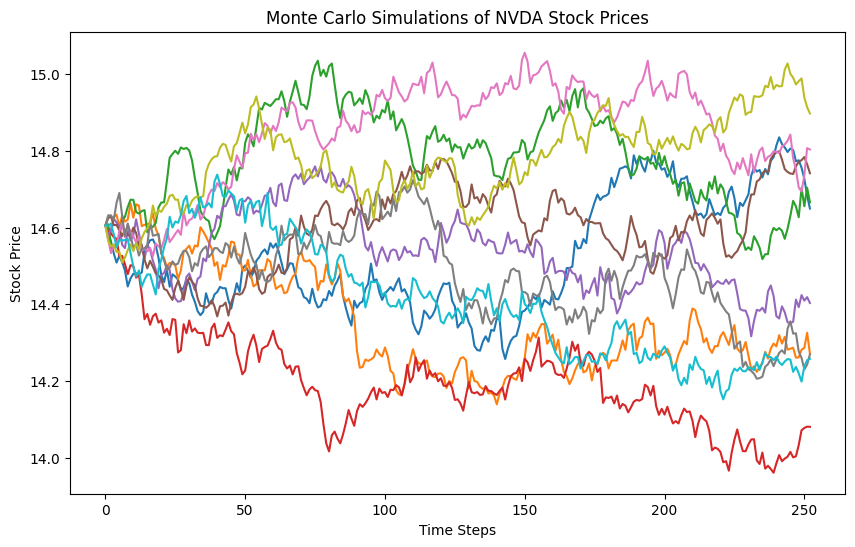

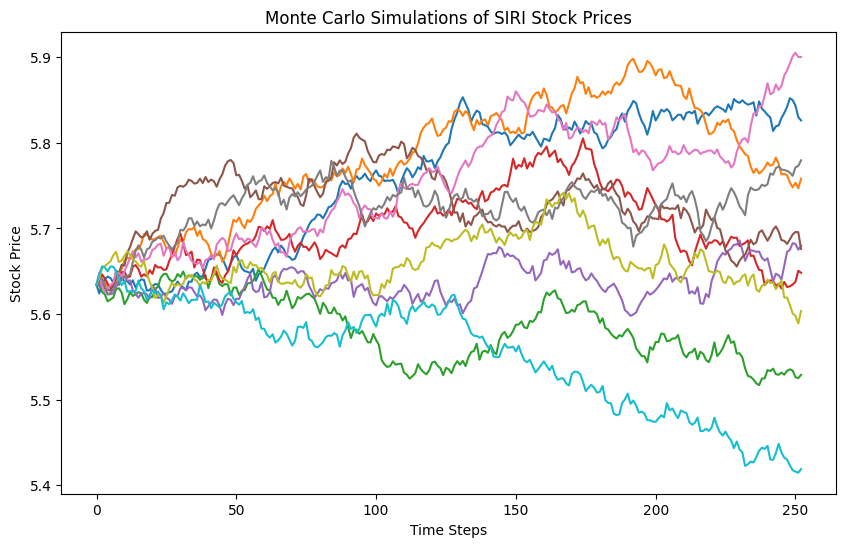

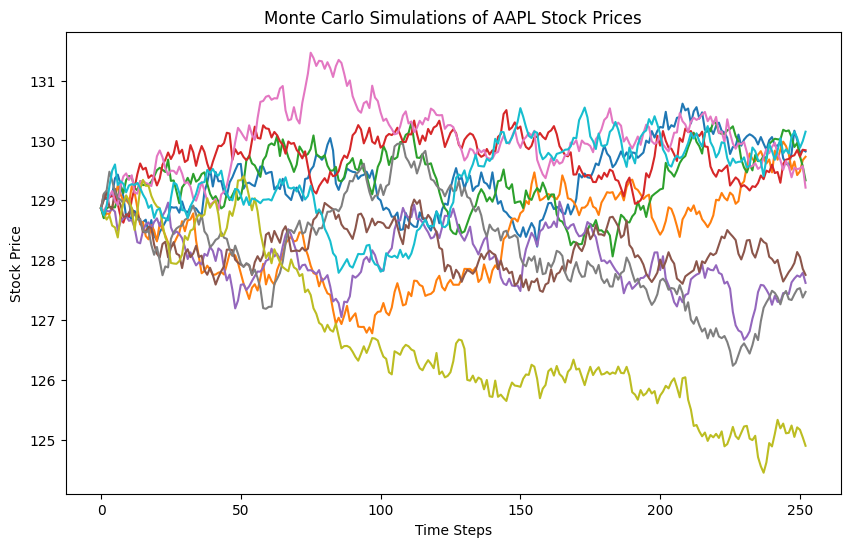

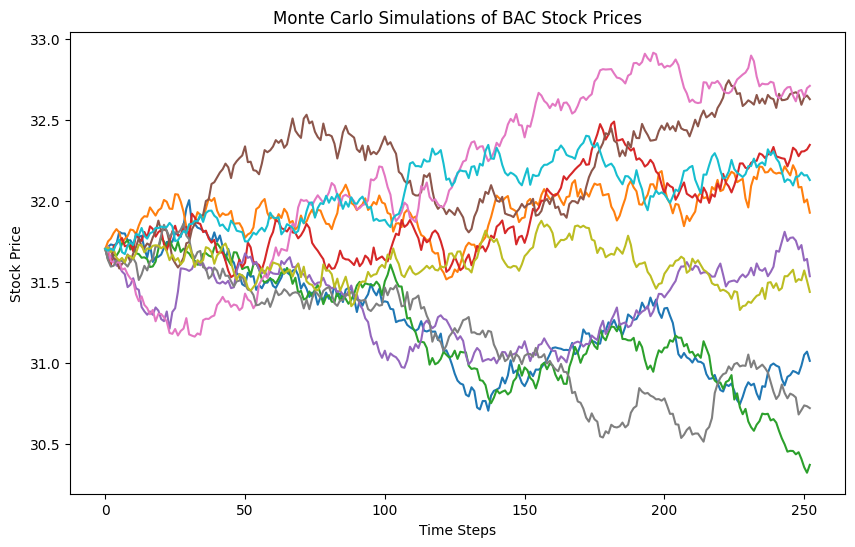

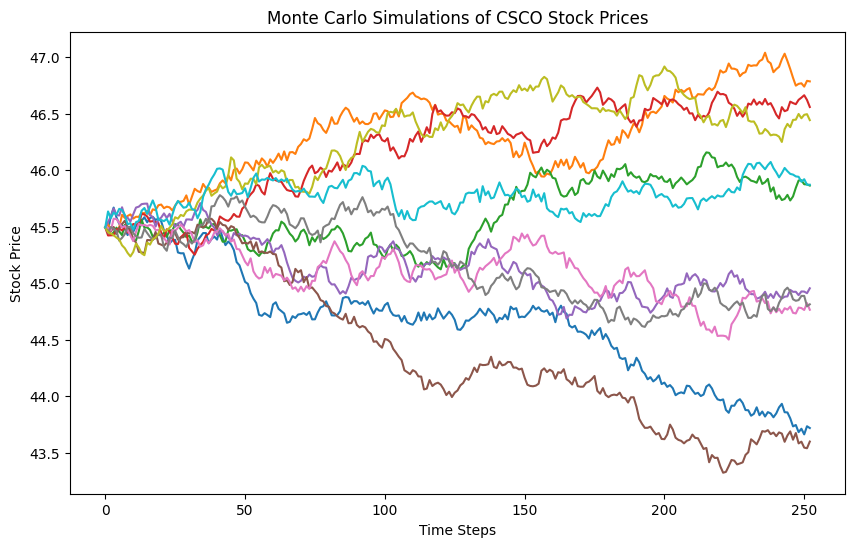

In [12]:
log_returns = np.log(data / data.shift(1)).dropna()

# Monte Carlo Simulation function
def monte_carlo_simulation(S0, mu, sigma, T, M, I):
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        Z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return S

# Plotting the results of Monte Carlo Simulation for each stock
for ticker in tickers:
    S0 = data[ticker][-1]
    mu = log_returns[ticker].mean()
    sigma = log_returns[ticker].std()
    T = 1.0
    M = 252
    I = 10000
    
    simulations = monte_carlo_simulation(S0, mu, sigma, T, M, I)
    
    plt.figure(figsize=(10, 6))
    plt.plot(simulations[:, :10])
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.title(f'Monte Carlo Simulations of {ticker} Stock Prices')
    plt.show()


Epoch 1/50


c:\Users\ksank\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 5.5155e-05 - val_loss: 0.0023
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 4.1240e-05 - val_loss: 0.0024
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 3.5067e-05 - val_loss: 0.0021
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 3.1658e-05 - val_loss: 0.0022
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.5392e-05 - val_loss: 0.0020
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 3.0099e-05 - val_loss: 0.0021
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 3.3843e-05 - val_loss: 0.0017
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 2.9648e-05 - val_loss: 0.0025
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.3174e-05 - val_loss: 0.0024
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 3.1781e-05 - val_loss: 0.0015
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━

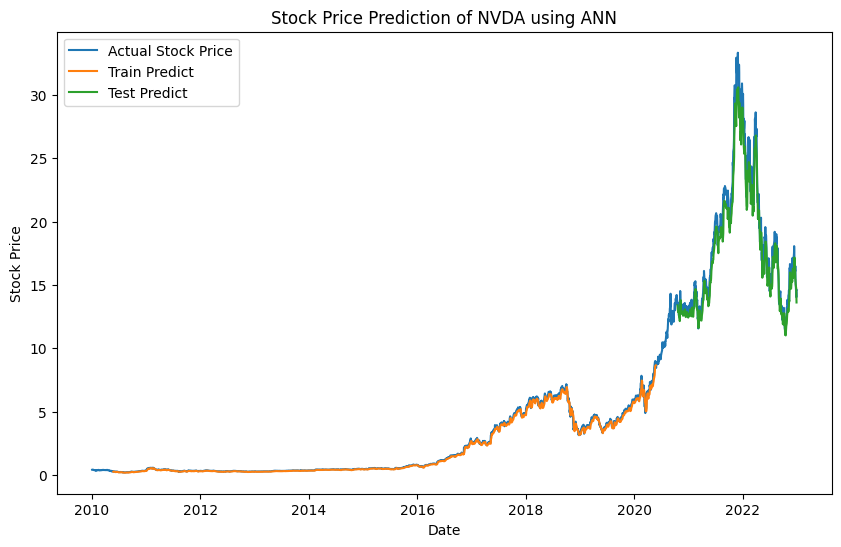

Pearson Correlation Coefficient for NVDA: 0.9896
T-Test Statistic for NVDA: 2.7500, P-Value: 0.0061
Mean Squared Error (MSE) of ANN Predictions for NVDA: 1.4430


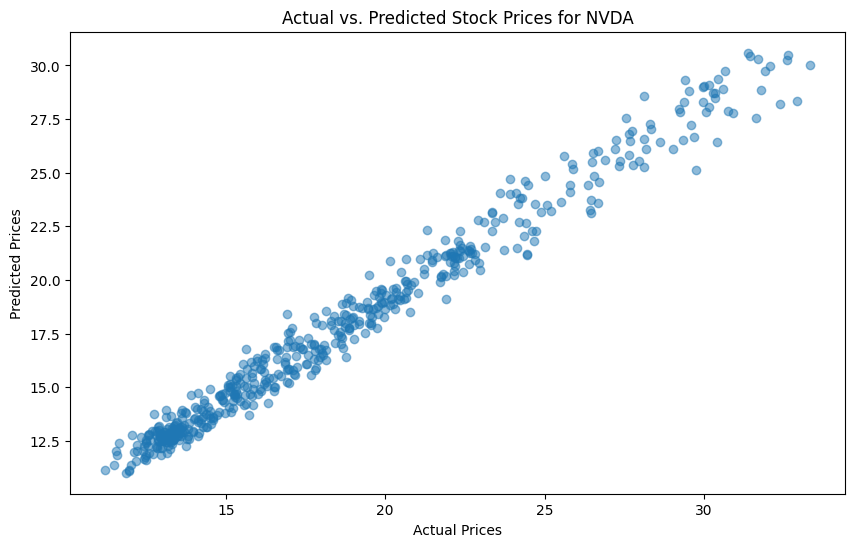

Epoch 1/50


c:\Users\ksank\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0698 - val_loss: 0.0070
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0013 - val_loss: 9.5517e-04
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 6.1979e-04 - val_loss: 9.6710e-04
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 5.4113e-04 - val_loss: 9.2241e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 5.3403e-04 - val_loss: 0.0012
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 5.6441e-04 - val_loss: 9.3910e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 5.4855e-04 - val_loss: 9.1702e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 5.1147e-04 - val_loss: 0.0011
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 5.4975e-04 - val_loss: 8.3649e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 5.1846e-04 - val_loss: 0.0010
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.3840e-04 - val_loss: 8.7849e-04
Epoch 12/5

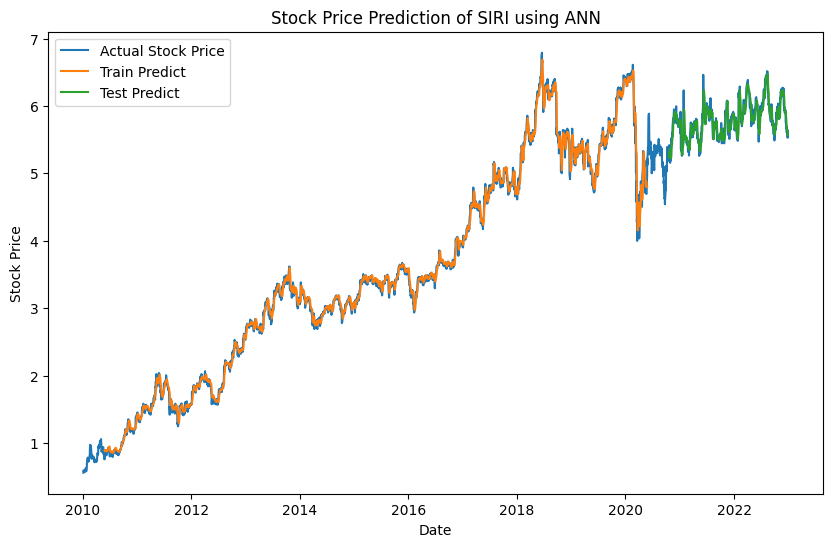

Pearson Correlation Coefficient for SIRI: 0.9069
T-Test Statistic for SIRI: 0.4812, P-Value: 0.6305
Mean Squared Error (MSE) of ANN Predictions for SIRI: 0.0126


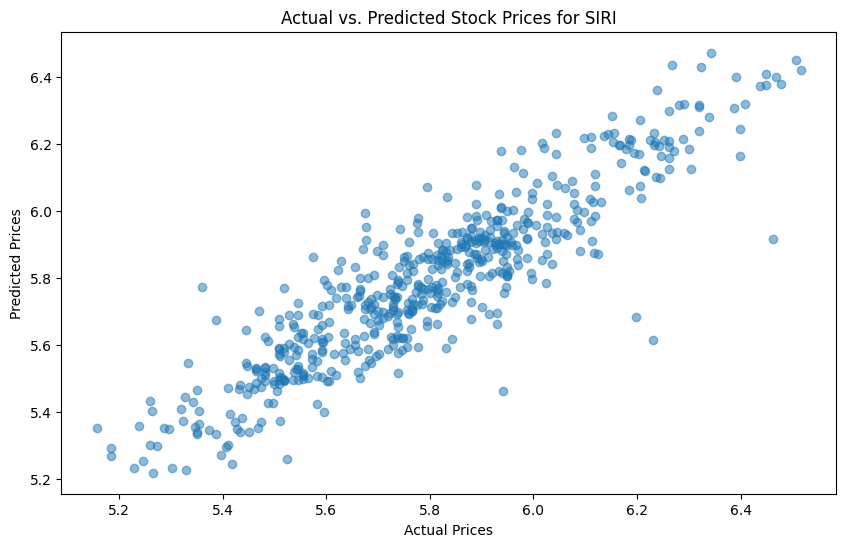

Epoch 1/50


c:\Users\ksank\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 7.6872e-05 - val_loss: 0.0018
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 6.0906e-05 - val_loss: 0.0012
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 5.6419e-05 - val_loss: 9.9762e-04
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.2146e-05 - val_loss: 0.0010
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 5.0229e-05 - val_loss: 0.0012
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 5.2430e-05 - val_loss: 9.9666e-04
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 5.6985e-05 - val_loss: 0.0021
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 6.5305e-05 - val_loss: 0.0010
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 6.1014e-05 - val_loss: 0.0018
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 4.9246e-05 - val_loss: 0.0010
Epoch 12/50
40/40 ━━━━━━━━

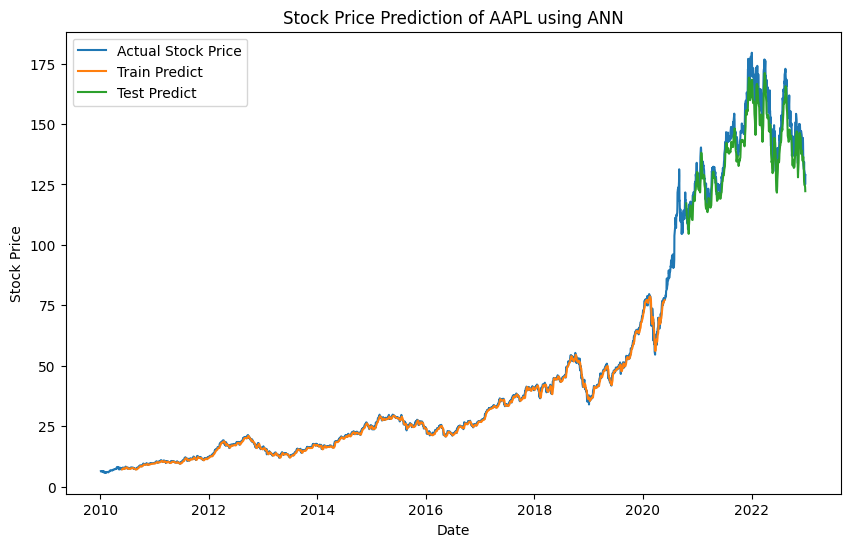

Pearson Correlation Coefficient for AAPL: 0.9714
T-Test Statistic for AAPL: 5.7843, P-Value: 0.0000
Mean Squared Error (MSE) of ANN Predictions for AAPL: 48.9504


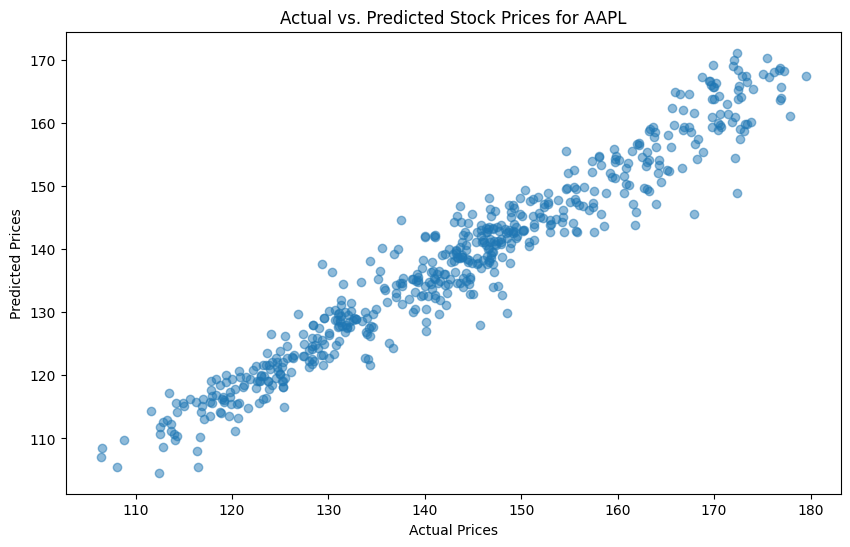

Epoch 1/50


c:\Users\ksank\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 0.0312 - val_loss: 0.0051
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 4.8110e-04 - val_loss: 0.0016
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 4.1007e-04 - val_loss: 0.0018
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 4.0038e-04 - val_loss: 0.0021
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.4056e-04 - val_loss: 0.0015
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.4943e-04 - val_loss: 0.0018
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 3.3276e-04 - val_loss: 0.0018
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.7274e-04 - val_loss: 0.0016
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 2.8507e-04 - val_loss: 0.0015
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.2840e-04 - val_loss: 0.0013
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 2.9542e-04 - val_loss: 0.0017
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━

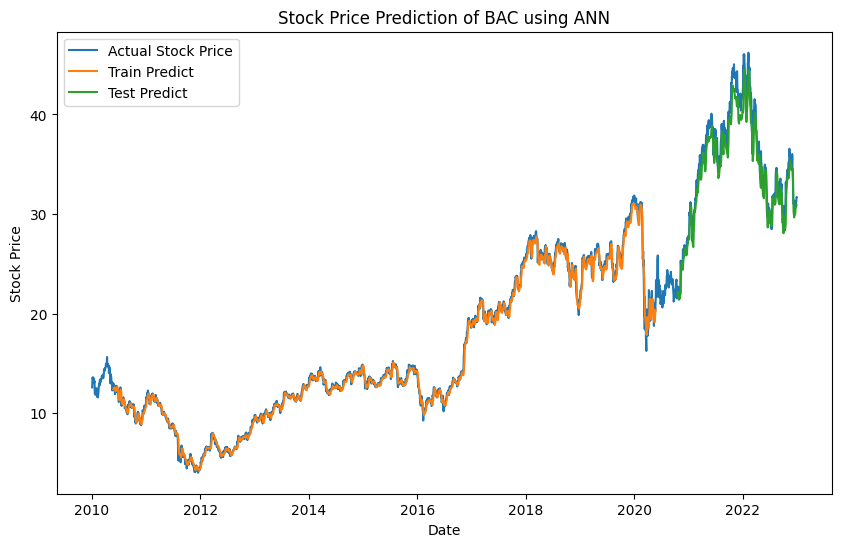

Pearson Correlation Coefficient for BAC: 0.9864
T-Test Statistic for BAC: 3.1562, P-Value: 0.0016
Mean Squared Error (MSE) of ANN Predictions for BAC: 1.9677


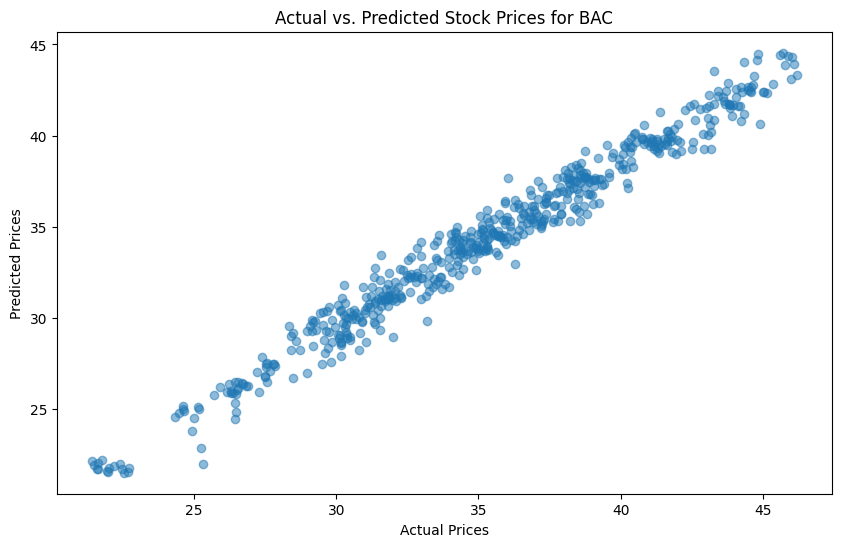

Epoch 1/50


c:\Users\ksank\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0291 - val_loss: 0.0013
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 4.8642e-04 - val_loss: 0.0011
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 3.5616e-04 - val_loss: 0.0011
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 3.4003e-04 - val_loss: 0.0012
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.9396e-04 - val_loss: 9.7820e-04
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.5089e-04 - val_loss: 9.5600e-04
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 3.3401e-04 - val_loss: 0.0012
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 3.4162e-04 - val_loss: 8.9496e-04
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.0249e-04 - val_loss: 9.0285e-04
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 3.4136e-04 - val_loss: 8.4942e-04
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 3.0491e-04 - val_loss: 7.7600e-04
Epoch 12/5

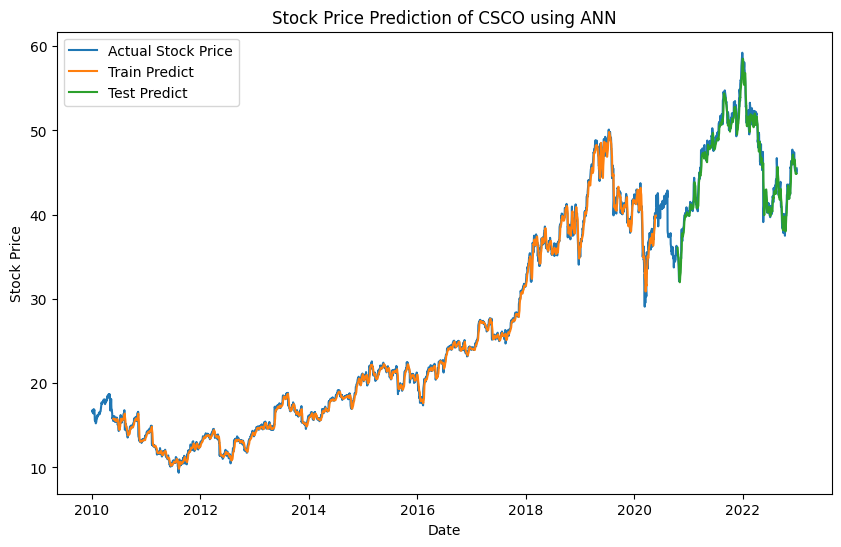

Pearson Correlation Coefficient for CSCO: 0.9861
T-Test Statistic for CSCO: 0.9145, P-Value: 0.3607
Mean Squared Error (MSE) of ANN Predictions for CSCO: 0.9665


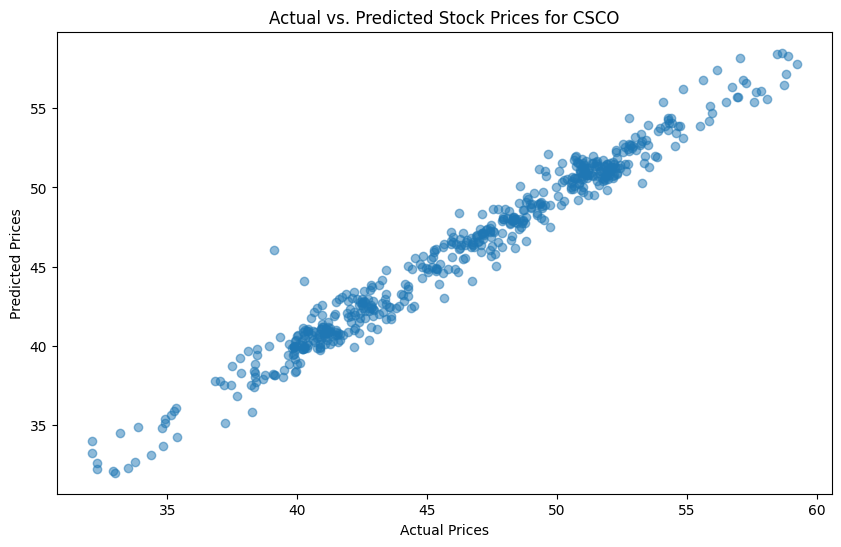

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, ttest_ind
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense  # type: ignore
from tensorflow.keras.layers import LSTM  # type: ignore
# ANN for Stock Price Prediction
# ANN for Stock Price Prediction
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Training and testing the ANN model for each stock
for ticker in tickers:
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data[ticker].values.reshape(-1, 1))

    train_size = int(len(scaled_data) * 0.8)
    train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

    time_step = 100
    X_train, Y_train = create_dataset(train_data, time_step)
    X_test, Y_test = create_dataset(test_data, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=64, verbose=1)

    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Reshape for inverse transform
    train_predict = train_predict.reshape(-1, 1)
    test_predict = test_predict.reshape(-1, 1)
    Y_train = Y_train.reshape(-1, 1)
    Y_test = Y_test.reshape(-1, 1)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    Y_train = scaler.inverse_transform(Y_train)
    Y_test = scaler.inverse_transform(Y_test)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(data[ticker].index, data[ticker], label='Actual Stock Price')
    plt.plot(data[ticker].index[time_step:len(train_predict)+time_step], train_predict, label='Train Predict')
    plt.plot(data[ticker].index[len(train_predict)+(time_step*2)+1:len(train_predict)+(time_step*2)+1+len(test_predict)], test_predict, label='Test Predict')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Stock Price Prediction of {ticker} using ANN')
    plt.legend()
    plt.show()

    # Statistical Analysis
    actual_prices = data[ticker][len(train_predict)+(time_step*2)+1:len(train_predict)+(time_step*2)+1+len(test_predict)].values
    predicted_prices = test_predict.flatten()

    correlation, _ = pearsonr(actual_prices, predicted_prices)
    print(f'Pearson Correlation Coefficient for {ticker}: {correlation:.4f}')

    t_stat, p_value = ttest_ind(actual_prices, predicted_prices)
    print(f'T-Test Statistic for {ticker}: {t_stat:.4f}, P-Value: {p_value:.4f}')

    mse = mean_squared_error(actual_prices, predicted_prices)
    print(f'Mean Squared Error (MSE) of ANN Predictions for {ticker}: {mse:.4f}')

    # Plot correlation
    plt.figure(figsize=(10, 6))
    plt.scatter(actual_prices, predicted_prices, alpha=0.5)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs. Predicted Stock Prices for {ticker}')
    plt.show()